# Encontro 8: Centro e Periferia

In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import seaborn as sns

import socnet as sn

from scipy.stats.stats import pearsonr
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

### Scaffold 3: Operacionalização e Teste das Hipóteses

In [2]:
def cost(c, A):
    row = np.matrix(c)

    C = np.multiply(row.transpose(), row)

    correlation, _ = pearsonr(C.flat, A.flat)

    return -correlation


def write_coreness(g):
    length = g.number_of_nodes()

    c = np.random.rand(length)

    A = sn.build_matrix(g)

    bounds = [(0, 1) for _ in range(length)]

    result = minimize(cost, c, args=(A,), bounds=bounds)

    norm = 0

    for i, n in enumerate(g.nodes):
        g.nodes[n]['coreness'] = result['x'][i]

        norm += g.nodes[n]['coreness'] ** 2

    for n in g.nodes:
        g.nodes[n]['coreness'] /= norm

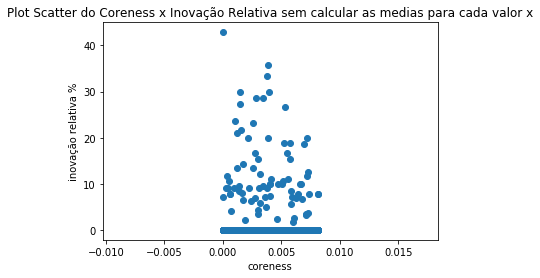

In [3]:
g = sn.load_graph('graphs/1958.gml')
sg = g.copy()

nodes = list(sg.nodes)

for n in nodes:
    if sg.nodes[n]['sessions'] < 10:
        sg.remove_node(n)
        
write_coreness(sg)

coreness = []
proportion_of_innovation = []
for n in sg.nodes:
        coreness.append(sg.nodes[n]['coreness'])
        if sg.nodes[n]['innovats'] > 0:
            proportion_of_innovation.append((sg.nodes[n]['innovats']/sg.nodes[n]['sessions']) * 100)
        else:
             proportion_of_innovation.append(0)
plt.scatter(coreness,proportion_of_innovation)
plt.title('Plot Scatter do Coreness x Inovação Relativa sem calcular as medias para cada valor x')
plt.xlabel('coreness')
plt.ylabel('inovação relativa %')
plt.show()

Transformando em função -> f(x) ->  cada x possui somente um valor y.

In [4]:
import numpy as np
res = {}
for i in range(0,len(coreness)):

    number = round(coreness[i],5)
        
    if number not in res:
        res[number]  = [proportion_of_innovation[i],1]
    else:
         res[number][0] += proportion_of_innovation[i]
         res[number][1] += 1

x = []
y = []
for i in res:
    x.append(i)
    y.append(res[i][0]/res[i][1])
    


    
        

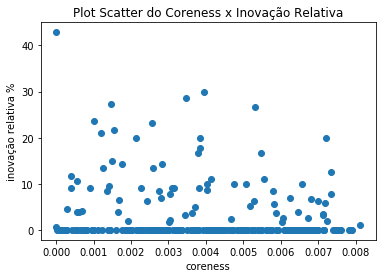

In [5]:
regression = np.polyfit(x,y,7)
plt.plot(x,y,'o')
plt.title('Plot Scatter do Coreness x Inovação Relativa')
plt.xlabel('coreness')
plt.ylabel('inovação relativa %')
plt.show()

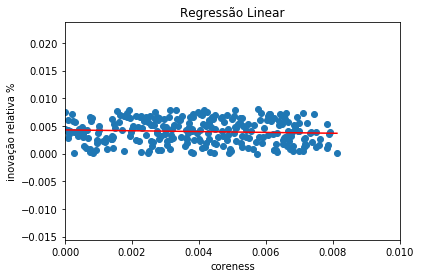

In [6]:
new_x = x.copy()
new_x.sort()
new_y = [a for _, a in sorted(zip(y,x), key=lambda pair: pair[0])]
for i in range(0,len(new_x)):
    new_x[i] = new_x[i]**1
regression = np.polyfit(new_x,new_y,1)

plt.scatter(new_x,new_y)
plt.plot(new_x,np.polyval(regression,new_x),'r-')
plt.xlim((0, 0.010))   
plt.title('Regressão Linear')
plt.xlabel('coreness')
plt.ylabel('inovação relativa %')
plt.show()

### elevando o coreness ao quadrado

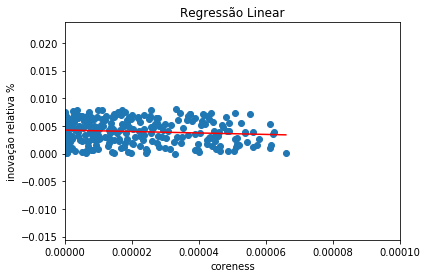

In [7]:
new_x = x.copy()
new_x.sort()
new_y = [a for _, a in sorted(zip(y,x), key=lambda pair: pair[0])]
for i in range(0,len(new_x)):
    new_x[i] = new_x[i]**2
regression = np.polyfit(new_x,new_y,1)

plt.scatter(new_x,new_y)
plt.plot(new_x,np.polyval(regression,new_x),'r-')
plt.title('Regressão Linear')
plt.xlabel('coreness')
plt.ylabel('inovação relativa %')
plt.xlim((0, 0.0001))   
plt.show()

também apresenta um comportamento nao esperado, esperava que fosse se acentuar bem a queda ou aumento da inovação relativa, entretanto, houve simplesmente uma bem pequena inclinação. Vamos ver se a correlação comprova isso para esse ano e para os demais.

In [8]:
print(np.abs(pearsonr(new_x,new_y))[0])

0.10612621613677878


# Conclusion between years

In [9]:
years_x = []
years_y = []
year_counter = 1950
while(year_counter <= 1960):
    years_x.append(year_counter)
    g = sn.load_graph('graphs/{0}.gml'.format(year_counter))
    sg = g.copy()

    nodes = list(sg.nodes)

    for n in nodes:
        if sg.nodes[n]['sessions'] < 10:
            sg.remove_node(n)

    write_coreness(sg)
    print('Coreness do ano {0} feito'.format(year_counter))

    coreness = []
    proportion_of_innovation = []
    for n in sg.nodes:
            coreness.append(sg.nodes[n]['coreness'])
            if sg.nodes[n]['innovats'] > 0:
                proportion_of_innovation.append((sg.nodes[n]['innovats']/sg.nodes[n]['sessions']) * 100)
            else:
                 proportion_of_innovation.append(0)

    res = {}
    for i in range(0,len(coreness)):
        number = round(coreness[i],5)

        if number not in res:
            res[number]  = [proportion_of_innovation[i],1]
        else:
             res[number][0] += proportion_of_innovation[i]
             res[number][1] += 1
    x = []
    y = []
    for i in res:
        x.append(i)
        y.append(res[i][0]/res[i][1])

    new_x = x.copy()
    new_x.sort()
    new_y = [a for _, a in sorted(zip(y,x), key=lambda pair: pair[0])]
    corr = np.abs(pearsonr(new_x,new_y))[0]
    years_y.append(corr)
    year_counter +=1


Coreness do ano 1950 feito
Coreness do ano 1951 feito
Coreness do ano 1952 feito
Coreness do ano 1953 feito
Coreness do ano 1954 feito
Coreness do ano 1955 feito
Coreness do ano 1956 feito
Coreness do ano 1957 feito
Coreness do ano 1958 feito
Coreness do ano 1959 feito
Coreness do ano 1960 feito


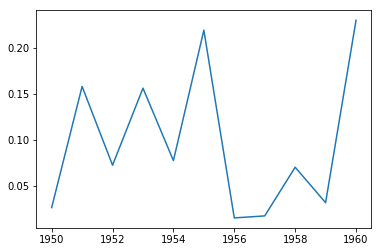

In [10]:
plt.plot(years_x,years_y)
plt.show()

## Como teste de hipótese para a pergunta: 'Entre os anos 50 e 60,estar na periferia ou no centro influencia a chance de  inovação no jazz ?'
Testaria as seguintes hipótesis, para checar se algo não é algo pontual de um ano só checaria o desvio padrão dos resultados  é menor que 0.2 (minha escolha). 
Para checar a influencia de estar no centro ou nao analisaria a média das correlações ao longo do ano (maior ou igual a 0.8).
Passando nas duas hipóteses diria que sim Influencia estar ou não no centro.


In [11]:
import math, os, sys
 
def somar(valores):
    soma = 0
    for v in valores:
        soma += v
    return soma


def media(valores):
    soma = somar(valores)
    qtd_elementos = len(valores)
    media = soma / float(qtd_elementos)
    return media


def variancia(valores):
    _media = media(valores)
    soma = 0
    _variancia = 0

    for valor in valores:
        soma += math.pow( (valor - _media), 2)
    _variancia = soma / float( len(valores) )
    return _variancia


def desvio_padrao(valores):
    return math.sqrt( variancia(valores) )

dp = desvio_padrao(years_y)
md =  media(years_y)
print(dp)
print(md)
if(dp < 0.1 and md >= 0.8):
    print('VALIDOU')
else:
    print('NEGAAADOOO')


0.07614292785440314
0.09755426944610007
NEGAAADOOO


# 4 - Conclusão

após tentar  analisar os dados tanto através de regressão linear e analisando os coeficientes de correlação entre o coreness  e a inovação no jazz ao longo do tempo, concluo que o fato de se localizar no centro ou na periferia não influencia diretamente na chance de inovação de um determinado nó (músico,compositor etc ). O comportamento demonstra ser aleatório.  Cheguei a essa conclusão com base tanto em um gráfico que demontra como essa correlação se comporta dentre os anos de 1950 e 1960, quanto analisando os anos individualmente e percebendo que a regressão linear do gráfico de coreness e inovação de fato retrata o que o gráfico geral estava me falando. Em resumo,  o fato de estar na periferia ou no centro do grafo do jazz não interfere na inovação do mesmo jeito por anos consecutivos, e de maneira geral importa pouco; O maior indice encontrado foi uma correlação de 0,24 em 1960.

# 5 - Voltando ao Contexto

O jazz é conhecido por ter sido originado a partir da fusão de diversos estilos musicais diferentes, a diversidade está no sangue do jazz.

    "Desde o começo do seu desenvolvimento, no início do século XX, o jazz produziu uma grande variedade de subgêneros, como o dixieland da década de 1910, o Swing das Big bands das décadas 1930 e 1940, o bebop de meados da década de 1940, o jazz latino das décadas de 1950 e 1960 e o fusion das décadas de 1970 e 1980. Devido à sua divulgação mundial, o jazz se adaptou a muitos estilos musicais locais, obtendo, assim, uma grande variedade melódica, harmônica e rítmica."
    
  Do trecho acima vale ressaltar a parte em que o autor comenta que "(...) o jazz se adaptou a  muitos estilos musicais locais...". Também é importante apontar que o jazz também é conhecido pela improvisação de seus artistas, que acaba tocando a mesma composição de diferentes formas, dependendo do momento, inspiração e o ambiente em que está tocando. Por que levantei esses pontos de maneira solta até então ? Para demonstrar a quantidade de fatores intrisecos ao jazz que influenciam na criação do diferente. Aonde quero chegar ? Minha teoria é a de que a inovação no jazz está muito mais ligada aos pontos descritos acima do que a centralidade de um nó na rede de artistas do jazz, por isso que quando comparada a inovação vs centralidade obtêm-se um comportamento aleatório. Se um ambiente em que um artista está inserido está passando por mudanças, seja socio-econômicas, religiosas, ou por mudanças de gosto musicais, esse artista tende a inovar mais esteja ele no centro ou na periferia da rede. Essa é uma carecterística do jazz em si, que estou expandindo para seus artistas como forma de justificar o comportamento observado nas análises.

